<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/BeltExam1AML_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar Drive**

In [318]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True) #  force_remount=True , pide eso no sé porqué

Mounted at /content/drive


# **Importación de Librerías**

## **Librerias Panda y Visualización**

In [319]:
import pandas as pd
from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

import missingno as msno
import numpy as np

sns.set_theme()


## **Librerias Machine Learning**

In [320]:
import  CleanDataDataframe as cdd 

# **Carga de Datos**

In [321]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df




In [322]:
filename = 'letter_frequency.xlsx'    

df = CargaDatos(filename)

# **Información de los Datos**


In [305]:
df.head(30) 

,Unnamed: 0,Letter,Frequency,Proportion
0,0.0,A,8.4966%,43.31
1,1.0,B,2.072%,10.56
2,2.0,C,4.5388%,23.13
3,3.0,D,3.3844%,17.25
4,4.0,E,11.1607%,56.88
5,5.0,F,1.8121000000000003%,9.24
6,6.0,G,2.4705%,12.59
7,7.0,H,3.0034%,15.31
8,8.0,I,7.5448%,38.45
9,9.0,J,0.1965%,1.00


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26 non-null     float64
 1   Letter      26 non-null     object 
 2   Frequency   26 non-null     object 
 3   Proportion  26 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


# **Verificar Datos Nulos isna**

In [307]:
df.isna().sum()

Unnamed: 0    0
Letter        0
Frequency     0
Proportion    0
dtype: int64

# **Verificar Datos Nulos (Null)**

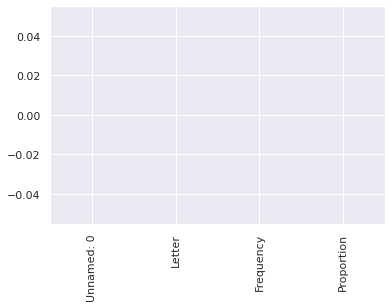

In [308]:
df.isnull().sum().plot.bar();

# **Verificar Datos Duplicados**

In [309]:
df.duplicated().sum()

0

# **Gráfica de Campos.** 

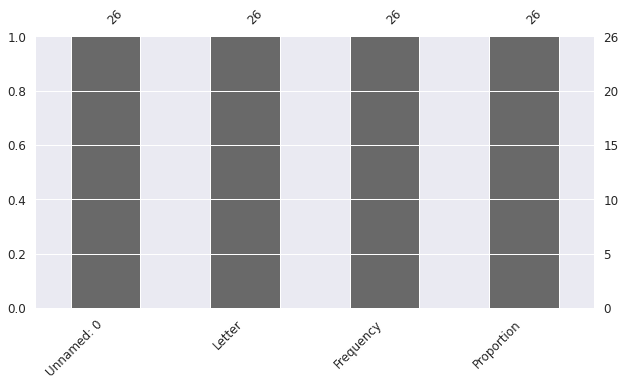

In [310]:
msno.bar(df, figsize=(10,5), fontsize=12);

In [311]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26.0,12.500000,7.648529,0.0,6.2500,12.50,18.7500,25.00
Proportion,26.0,19.603077,15.385597,1.0,7.1925,15.75,32.7475,56.88


In [312]:
df.shape

(26, 4)

## **Preparación,Análisis y Limpieza de Datos**

In [313]:
data = cdd.AnalizaDataFrame(df)
data

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length
0,Unnamed: 0,26,0,0,0.0,float64,26.0,0.0
1,Letter,0,26,0,0.0,object,26.0,1.0
2,Frequency,0,26,0,0.0,object,26.0,7.0
3,Proportion,26,0,0,0.0,float64,26.0,0.0


**No existen valores NaN en el dataframe**


In [314]:
cdd.ShowDataFieldsNoNumber(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [315]:
cdd.ShowDataFieldsNaN(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


# **Proceso depuración Datos**


## **Datos no number**

In [316]:
cont = 0
contador_datos = 0

for index in data.index:
  if data['Numbers'][index] >0 and data['NoNumbers'][index] >0:
    contador_datos += 1
    df_NoNumber =  cdd.ShowNumber(df ,data['Field'][index], False ) 
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    print(f" field = '{data['Field'][index]}' ")
    
    if cont == 0:
      df_NoNumber = ( cdd.ShowNumber(df ,data['Field'][index], False ) )
    else:
      df_NoNumber = pd.merge( df_NoNumber , (cdd.ShowNumber(df ,data['Field'][index], False ))  )
    
    cont += 1

if contador_datos>0:
  df_NoNumber

### **Variables para Procesos de datos**

In [317]:
#Habilitar Estas variables para realizar una acción

bEliminaColumnaNaN = True
bEliminaFilasNaN   = False

bCambiaTipoDato    = True
bActualizaColumna  = False




# **Actualiza una fila especifica**

In [324]:
if bActualizaColumna == True:
  
  filtro = cdd.ShowNumber(df ,'<Campo a Actualizar>', False, True )
  df.loc[ filtro == False  , ['<Campo a Actualizar>']] = 27 #Valor a reemplazar Numerico ó No
  df[filtro == False]


# Actualiza comlumna **Frequency** 

Se elimina signo **%** del campo **Frequency** 

In [325]:
df['Frequency'] = df['Frequency'].str.replace('%', '')
df

,Unnamed: 0,Letter,Frequency,Proportion
0,0.0,A,8.4966,43.31
1,1.0,B,2.072,10.56
2,2.0,C,4.5388,23.13
3,3.0,D,3.3844,17.25
4,4.0,E,11.1607,56.88
5,5.0,F,1.8121000000000003,9.24
6,6.0,G,2.4705,12.59
7,7.0,H,3.0034,15.31
8,8.0,I,7.5448,38.45
9,9.0,J,0.1965,1.00


# **Cambiando TipoDato de Columna**

Se cambia tipo dato de columna **Frequency**, para cumplir con el diccionario

In [326]:
if bCambiaTipoDato == True:
  df = cdd.CambiaTipoDatoDF(df , 'Frequency' , 'float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26 non-null     float64
 1   Letter      26 non-null     object 
 2   Frequency   26 non-null     float64
 3   Proportion  26 non-null     float64
dtypes: float64(3), object(1)
memory usage: 960.0+ bytes


# **Campos NaN**

In [327]:
#Filtro por los errores en los datos
cdd.ShowDataFieldsNaN(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [328]:
#def ShowNaNdf( vpdf, vpfield, retornaFiltro = False):
cont = 0
contador_datos = 0

for index in data.index:
  
  if data['NaN'][index] >0:
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    #print(f" field = '{data['Field'][index]}' ")
    if cont == 0:
      
      #print(f"Ciclo ={cont} field = '{data['Field'][index]}' ")
      df_NaNdf = ( cdd.ShowNaNdf(df ,data['Field'][index] ) )
      #print(df_NaNdf)
    else:
      #print(f"Ciclo ={cont}  merge field = '{data['Field'][index]}' ")
      df_NaNdf_aux = cdd.ShowNaNdf(df ,data['Field'][index])
      #print(df_NaNdf_aux)
      df_NaNdf = pd.merge( df_NaNdf , df_NaNdf_aux , how='outer')  
      contador_datos += 1
    
    cont += 1

if contador_datos > 0 :
  df_NaNdf

# **Eliminando Filas NaN**

In [329]:
if bEliminaFilasNaN == True:
  columns = [] # Colocar nombre de los campos  a eliminar filas entre comillas y separado por coma ['Campo1','Campo2']
  for column in columns:
    print(f"Eliminando row = {column}")
    filtro_NaN = cdd.ShowNaNdf(df ,column, True)
    df = df[~filtro_NaN]

df

,Unnamed: 0,Letter,Frequency,Proportion
0,0.0,A,8.4966,43.31
1,1.0,B,2.0720,10.56
2,2.0,C,4.5388,23.13
3,3.0,D,3.3844,17.25
4,4.0,E,11.1607,56.88
5,5.0,F,1.8121,9.24
6,6.0,G,2.4705,12.59
7,7.0,H,3.0034,15.31
8,8.0,I,7.5448,38.45
9,9.0,J,0.1965,1.00


# **Elimina una o varias columnas**

Se elimina columna "**Unnamed: 0**" para cumplir con el requerimiento del diccionario de Datos.


In [330]:
if bEliminaColumnaNaN == True:
  columns = ['Unnamed: 0'] # Colocar las columnas a eliminar entre comillas ''
  for column in columns:
    print(f"column = {column}")
    cdd.EliminaColumnas(df,column) 

df

column = Unnamed: 0


,Letter,Frequency,Proportion
0,A,8.4966,43.31
1,B,2.0720,10.56
2,C,4.5388,23.13
3,D,3.3844,17.25
4,E,11.1607,56.88
5,F,1.8121,9.24
6,G,2.4705,12.59
7,H,3.0034,15.31
8,I,7.5448,38.45
9,J,0.1965,1.00


# **Manejo de Datos Duplicados**

In [331]:
data_duplicated = df.duplicated()
df[data_duplicated]

,Letter,Frequency,Proportion


# **Elimina Duplicados**

In [332]:
df.drop_duplicates(inplace=True)
df

,Letter,Frequency,Proportion
0,A,8.4966,43.31
1,B,2.0720,10.56
2,C,4.5388,23.13
3,D,3.3844,17.25
4,E,11.1607,56.88
5,F,1.8121,9.24
6,G,2.4705,12.59
7,H,3.0034,15.31
8,I,7.5448,38.45
9,J,0.1965,1.00


In [333]:
data = cdd.AnalizaDataFrame(df)
data

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length
0,Letter,0,26,0,0.0,object,26.0,1.0
1,Frequency,26,0,0,0.0,float64,26.0,0.0
2,Proportion,26,0,0,0.0,float64,26.0,0.0


In [334]:
df.head()

,Letter,Frequency,Proportion
0,A,8.4966,43.31
1,B,2.0720,10.56
2,C,4.5388,23.13
3,D,3.3844,17.25
4,E,11.1607,56.88


# **Siempre Reinicar Indice después de borrar filas antes**

In [335]:
# Reseteando Indices por haber eliminado campos anteriormente
df.reset_index(inplace=True, drop=True)
df

,Letter,Frequency,Proportion
0,A,8.4966,43.31
1,B,2.0720,10.56
2,C,4.5388,23.13
3,D,3.3844,17.25
4,E,11.1607,56.88
5,F,1.8121,9.24
6,G,2.4705,12.59
7,H,3.0034,15.31
8,I,7.5448,38.45
9,J,0.1965,1.00


**Dataframe cumple con el formato solicitado**

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Letter      26 non-null     object 
 1   Frequency   26 non-null     float64
 2   Proportion  26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 752.0+ bytes


df.descripbe().T

In [337]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,26.0,3.846158,3.018621,0.1962,1.4119,3.09,6.424575,11.1607
Proportion,26.0,19.603077,15.385597,1.0000,7.1925,15.75,32.747500,56.8800


# **Filtrado de Datos**

# **Gráfico inicial**


**Visalización Frecuencia de Letras**

**Se puede apreciar en el gráfico de Barrar la frecuencia de cada Letra**

In [345]:
plt.figure(dpi=200) #resolución de figura (implica tamaño)
fig = px.bar(df, x='Letter', y='Frequency' , title="Gráfico con visalización Frecuencia de Letras" )
fig.show()    

<Figure size 1200x800 with 0 Axes>

**Utilizar Python o SQL para mostrar las 5 letras más comunes junto con sus frecuencias y proporciones.**

In [346]:
datos_grafos=df.sort_values(by=['Frequency'],  ascending=False).head(5)
datos_grafos

,Letter,Frequency,Proportion
4,E,11.1607,56.88
0,A,8.4966,43.31
17,R,7.5809,38.64
8,I,7.5448,38.45
14,O,7.1635,36.51


In [347]:
plt.figure(dpi=80) #resolución de figura (implica tamaño)
fig = px.pie(datos_grafos, values = 'Frequency', names='Letter' , title = '5 letras más comunes')
fig.show()


<Figure size 480x320 with 0 Axes>

In [348]:
datos_grafos=df.sort_values(by=['Frequency'],  ascending=True).head(5)
datos_grafos

,Letter,Frequency,Proportion
16,Q,0.1962,1.00
9,J,0.1965,1.00
25,Z,0.2722,1.39
23,X,0.2902,1.48
21,V,1.0074,5.13


**Utilizar Python o SQL para mostrar las 5 letras menos comunes junto con sus frecuencias y proporciones**

In [349]:
plt.figure(dpi=80) #resolución de figura (implica tamaño)
fig = px.pie(datos_grafos, values = 'Frequency', names='Letter' , title = '5 letras menos comunes')
fig.show()

<Figure size 480x320 with 0 Axes>

## **Filtrar el conjunto de datos para mostrar solo filas para vocales (A, E, I, O, U)**

In [343]:
datos_grafos= df.query("Letter in ('A','E','I','O','U')")
datos_grafos

,Letter,Frequency,Proportion
0,A,8.4966,43.31
4,E,11.1607,56.88
8,I,7.5448,38.45
14,O,7.1635,36.51
20,U,3.6308,18.51


In [344]:
fig = px.scatter(datos_grafos, x="Letter", y="Frequency",
	         size="Frequency", hover_name="Letter",color="Letter", title="Gráfico solo Vocales")
fig.show()

In [352]:
fig = px.scatter(df, x="Letter", y="Frequency",
	         size="Proportion", hover_name="Letter",color="Letter", title="Gráfico con todas las letras")
fig.show()